## Importar librerias

In [3]:
### Importar librerias
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Importar archivo .CSV

In [8]:
### Importamos dataset de valuación de jugadores de fútbol
### https://www.kaggle.com/datasets/davidcariboo/player-scores

df = pd.read_csv('../4- SQL en python/player_valuations.csv')

## Exploración inicial

In [6]:
df

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
464777,1073997,2024-01-08,150000,18,L1
464778,361508,2024-01-10,300000,39,L1
464779,705337,2024-01-10,125000,26459,UKR1
464780,800946,2024-01-10,1000000,79,L1


In [4]:
### Cambiamos el nombre de las columnas de inglés a español
df.rename(columns={'player_id':'id_jugador','date':'fecha','market_value_in_eur': 'precio_en_euros', 'current_club_id':'id_club_actual', 'player_club_domestic_competition_id':'id_competicion_domestica'}, inplace=True)

In [5]:
# Ordenar el DataFrame en función de la columna precio_en_euros de manera descendente
df_sorted = df.sort_values(by='precio_en_euros', ascending=False)

df_sorted

,id_jugador,fecha,precio_en_euros,id_club_actual,id_competicion_domestica
292158,342229,2019-12-19,200000000,583,FR1
268400,342229,2019-06-03,200000000,583,FR1
252371,342229,2018-12-17,200000000,583,FR1
443838,418560,2023-06-20,180000000,281,GB1
328329,342229,2020-10-15,180000000,583,FR1
...,...,...,...,...,...
456637,221815,2023-10-25,10000,1429,IT1
458037,55869,2023-12-04,10000,6676,GR1
458031,19987,2023-12-04,10000,2672,GR1
388267,621282,2022-02-01,10000,1005,IT1


## Estadística descriptiva

### 1. Resumén Estadístico Básico

In [11]:
# Configurar el formato de visualización para mostrar números completos
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe()

,id_jugador,precio_en_euros,id_club_actual
count,464782.000,464782.000,464782.000
mean,204484.605,2359657.620,4060.930
std,186128.543,6666213.585,9516.104
min,10.000,0.000,3.000
25%,56841.000,200000.000,369.000
50%,149526.000,500000.000,1010.000
75%,297772.000,1500000.000,2969.000
max,1186012.000,200000000.000,83678.000


In [12]:
### Funciones de Pandas
df['precio_en_euros'].mean()

np.float64(2359657.620129437)

In [8]:
df['precio_en_euros'].median()

np.float64(500000.0)

In [9]:
df['precio_en_euros'].mode()

0    300000
Name: precio_en_euros, dtype: int64

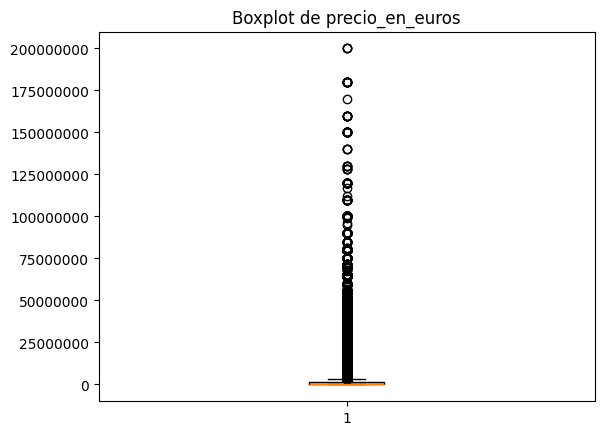

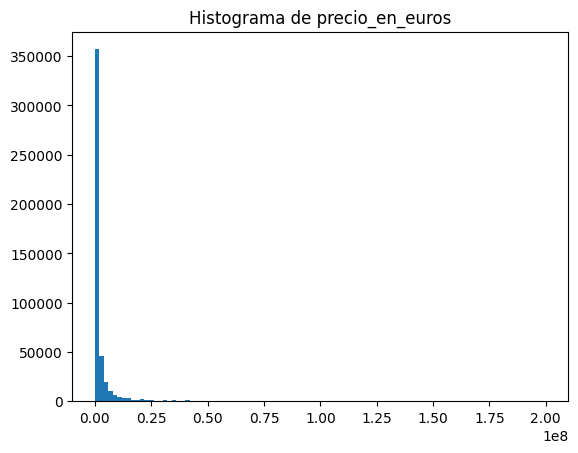

In [13]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df['precio_en_euros'])
plt.title('Boxplot de precio_en_euros')
plt.show()

# Histograma con matplotlib
plt.hist(df['precio_en_euros'], bins=100)  # Puedes ajustar el número de bins según tus preferencias
plt.title('Histograma de precio_en_euros')
plt.show()

**Limpieza de datos utilizando el IQR**

Este proceso está relacionado con la identificación y tratamiento de outliers en un conjunto de datos. Aquí hay una explicación detallada paso a paso:

**1. Cálculo de los Cuartiles (Q1, Q3):**

- Q1 representa el primer cuartil, que es el valor por debajo del cual se encuentra el 25% de los datos.
- Q3 representa el tercer cuartil, que es el valor por debajo del cual se encuentra el 75% de los datos.
- Estos cuartiles dividen el conjunto de datos en cuatro partes iguales.

**2. Cálculo del Rango Intercuartílico (IQR):**

- El rango intercuartílico es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1).
- Matemáticamente, IQR = Q3 - Q1.

**3. Definición de Límites para Outliers:**

- Se establecen límites superior e inferior para identificar valores atípicos en los datos.
- El límite inferior se calcula restando 1.5 veces el IQR a Q1: lower_bound = Q1 - 1.5 * IQR.
- El límite superior se calcula sumando 1.5 veces el IQR a Q3: upper_bound = Q3 + 1.5 * IQR.

**4. Identificación de Outliers:**

- Cualquier valor en el conjunto de datos que sea menor que el límite inferior o mayor que el límite superior se considera un outlier.

Este enfoque, basado en el rango intercuartílico y los límites establecidos, es una técnica común para identificar y manejar valores atípicos en un conjunto de datos. La idea es que los valores atípicos están más allá de ciertos límites estadísticos y pueden ser tratados de manera especial según los requisitos del análisis.

In [14]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['precio_en_euros'].quantile(0.25)
Q3 = df['precio_en_euros'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df[(df['precio_en_euros'] >= lower_bound) & (df['precio_en_euros'] <= upper_bound)]

In [19]:
df_filtered.sort_values(by='precio_en_euros', ascending=False)

,id_jugador,fecha,precio_en_euros,id_club_actual,id_competicion_domestica
28584,7353,2009-07-22,3400000,16795,ES1
28591,7568,2009-07-22,3400000,3368,ES1
87605,6160,2013-01-14,3400000,800,IT1
130425,38954,2015-01-11,3400000,1049,ES1
30252,40372,2009-09-04,3400000,430,IT1
...,...,...,...,...,...
452794,1120127,2023-09-14,10000,83678,UKR1
452796,1143804,2023-09-14,10000,83678,UKR1
452788,1074059,2023-09-14,10000,83678,UKR1
452463,954211,2023-08-25,10000,3840,TR1


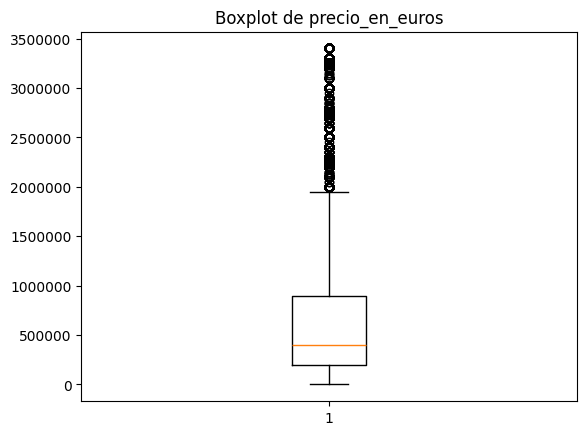

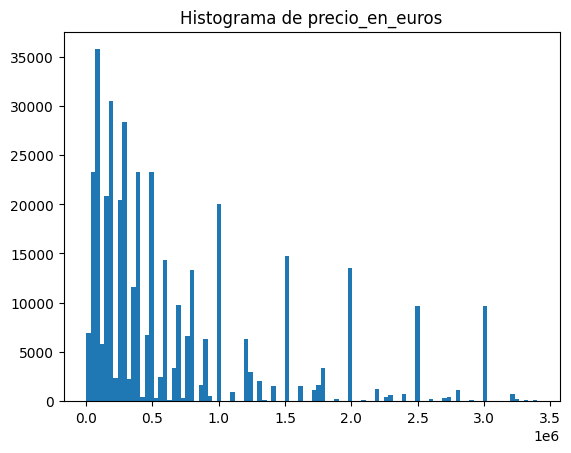

In [16]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['precio_en_euros'])
plt.title('Boxplot de precio_en_euros')
plt.show()

# Histograma con matplotlib
plt.hist(df_filtered['precio_en_euros'], bins=100)  # Puedes ajustar el número de bins según tus preferencias
plt.title('Histograma de precio_en_euros')
plt.show()

### 2. Medidas de dispersión

In [17]:
### Rango
rango = df_filtered['precio_en_euros'].max() - df_filtered['precio_en_euros'].min()

In [23]:
rango

np.int64(3400000)

**Varianza:** 

- La varianza es una medida de la dispersión o extensión de un conjunto de datos.
- Indica cuánto se alejan los valores individuales del valor medio (promedio) del conjunto.
- Si los datos están muy dispersos, la varianza será alta; si están agrupados alrededor de la media, la varianza será baja.
- Se calcula sumando los cuadrados de las diferencias entre cada valor y la media, y luego dividiendo por el número total de valores.

In [24]:
### Varianza:
df_filtered['precio_en_euros'].var()

np.float64(533444930480.1542)

**Desviación Estándar:** 

- La desviación estándar es simplemente la raíz cuadrada de la varianza.
- Proporciona una medida de dispersión en la misma escala que los datos originales.
- Es una medida más fácil de interpretar porque está en las mismas unidades que los datos.
- Si la desviación estándar es pequeña, significa que los datos tienden a estar cerca del promedio; si es grande, significa que los datos están más dispersos.

In [25]:
### Desviación Estándar:
df_filtered['precio_en_euros'].std()

np.float64(730373.144687121)

### 3. Correlación

La correlación entre dos variables es una medida estadística que describe la relación estadística y la dependencia entre ellas. En otras palabras, la correlación indica cómo cambia una variable en relación con la otra.

La correlación mide la relación lineal entre dos variables. El coeficiente de correlación varía entre -1 y 1. 
- Si es 1, significa una correlación positiva perfecta.
- Si es -1, indica una correlación negativa perfecta.
- Si es 0, no hay correlación lineal.


In [26]:
# Creamos un nuevo dataframe solo con variables númericas para poder calcular la correlación
df_nuevo = df[['precio_en_euros', 'id_club_actual']].copy()

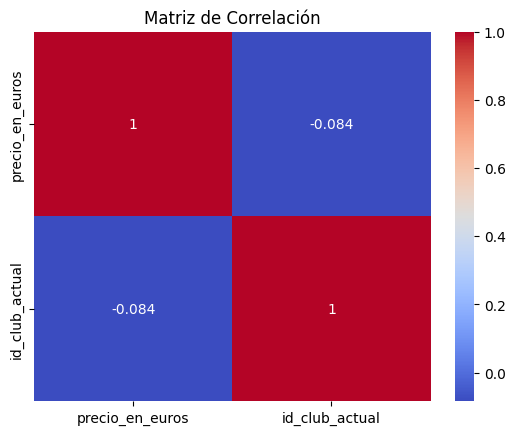

In [27]:
# Cálculo de la matriz de correlación
correlation_matrix = df_nuevo.corr()

# Visualización del heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### 4. Diagrama de dispersión

Un diagrama de dispersión, también conocido como gráfico de dispersión o scatter plot en inglés, es una representación visual de la relación entre dos variables. Cada punto en el diagrama de dispersión representa un par de valores (uno para cada variable) y se coloca en un sistema de coordenadas cartesianas, donde una variable se representa en el eje x (horizontal) y la otra en el eje y (vertical).

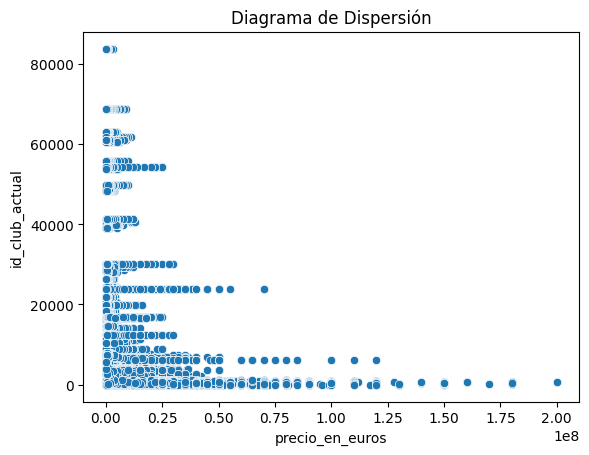

In [28]:
# Diagrama de dispersión con Seaborn
sns.scatterplot(x='precio_en_euros', y='id_club_actual', data=df_nuevo)
plt.title('Diagrama de Dispersión')
plt.show()


### 5. Repetimos los puntos 3 y 4 con un dataset en dónde seguro vamos a encontrar correlación entre variables

In [29]:
### Importamos dataset de valores casas
df_houses = pd.read_csv("kc_house_data.csv")

In [37]:
### https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


In [30]:
# Creamos un nuevo dataframe con las variables númericas que nos interesan
df_houses_corr = df_houses[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']].copy()

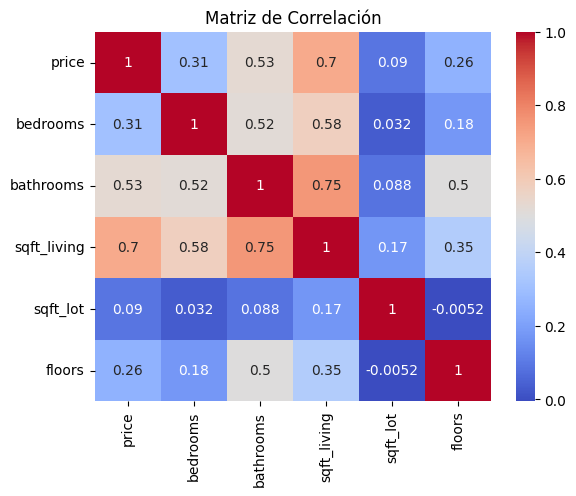

In [31]:
# Cálculo de la matriz de correlación
correlation_matrix = df_houses_corr.corr()

# Visualización del heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

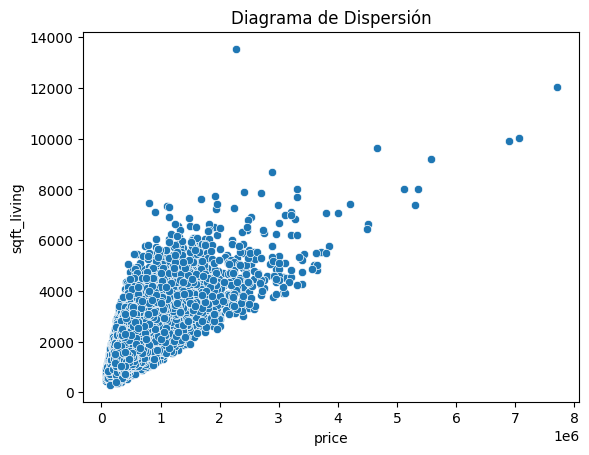

In [32]:
### Diagrama de dispersión con Seaborn
### El diagrama de dispersión muestra la relación entre dos variables. Se puede usar para identificar patrones y tendencias.
sns.scatterplot(x='price', y='sqft_living', data=df_houses_corr)
plt.title('Diagrama de Dispersión')
plt.show()